In [113]:
# Author: Lokesh Palacharla
# Importing required libraries
import pandas as pd
from pandasql import sqldf
import seaborn as sn

In [114]:
# Reading the given csv file into a dataframe
df = pd.read_csv (r'/Users/lokeshpalacharla/Desktop/screening_exercise_orders_v201810.csv')

In [115]:
# Displaying the data frame
print (df)

       customer_id  gender                 date   value  predicted_gender
0             1000       0  2017-01-01 00:11:31  198.50                 1
1             1001       0  2017-01-01 00:29:56  338.00                 1
2             1002       1  2017-01-01 01:30:31  733.00                 1
3             1003       1  2017-01-01 01:34:22  772.00                 1
4             1004       0  2017-01-01 03:11:54  508.00                 1
...            ...     ...                  ...     ...               ...
13466         9810       1  2017-12-31 22:16:20  794.44                 0
13467         9811       1  2017-12-31 22:24:06  148.60                 0
13468         9812       0  2017-12-31 23:01:10  153.00                 1
13469         9813       0  2017-12-31 23:11:02  534.00                 1
13470         8658       0  2017-12-31 23:35:09  306.60                 1

[13471 rows x 5 columns]


In [116]:
######################### Question A ############################## 
# Populated the required dataframe with count of orders for each customer by latest date
output = sqldf("select df.customer_id, df.gender, df.date, cus.order_count as order_count from df INNER JOIN ( select customer_id, count(customer_id) as order_count, max(date) as MaxDate from df group by customer_id ) as cus ON df.customer_id = cus.customer_id and df.date = cus.MaxDate order by df.customer_id asc, df.date desc" )


In [117]:
# Displaying the first 10 records of the dataframe
output.head(10)

,customer_id,gender,date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


In [118]:
######################### Question B ##############################
# Extracted the date from the given timestamp column
output['date'] = pd.to_datetime(output['date'],format='%Y-%m-%d')
# Grouping the count of orders by the week
order_ts = output.groupby(output.date.dt.strftime('%W')).order_count.count()

<AxesSubplot:xlabel='Week', ylabel='Count of Orders'>

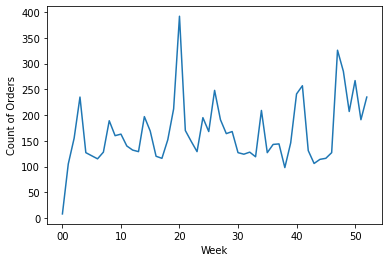

In [119]:
# Ploting the count of orders by week
order_ts.plot( xlabel = 'Week', ylabel = 'Count of Orders')

In [132]:
######################### Question C ##############################
# Calculated the mean order values for each gender 
df.groupby(df.gender).value.mean()


gender
0    363.890006
1    350.708361
Name: value, dtype: float64

In [135]:
######################### Question D ##############################
# Preparing the dataframe with actual gender values and predicted gender values
conf_df = sqldf("select distinct customer_id, gender, predicted_gender from df")

# Checking the top 20 dataframe values
conf_df.head(20)

,customer_id,gender,predicted_gender
0,1000,0,1
1,1001,0,1
2,1002,1,1
3,1003,1,1
4,1004,0,1
5,1005,1,0
6,1006,1,1
7,1007,0,0
8,1008,0,0
9,1009,1,1


Predicted_gender     0     1
Actual_gender               
0                 2189  2218
1                  895  3512


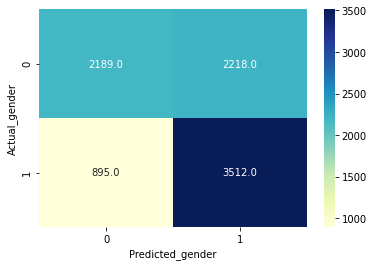

In [137]:
# Calculated the confusion matrix and plotted the confusion matrix
cm =  pd.crosstab(conf_df['gender'], conf_df['predicted_gender'], rownames=['Actual_gender'], colnames=['Predicted_gender'], margins = False)
print(cm)
sn.heatmap(cm, cmap = 'YlGnBu',annot = True,fmt=".1f")
plt.show()

In [124]:
# Explanation 

# For question A, I've used Pandas and Pandasql packages as they are helpful while preparing the required dataframe. Pandasql package provides us with an option to run sql queries on the dataframe and it easily retrives the number of orders placed by the customer and sorts it based on the most recent date, ascending customer_id and stores it in the dataframe

# For question B, I've used to_datetime(),groupby(),strftime(),plot() functions available in the pandas package. It helped me to perform date conversion from timestamp to Year-month-date format and group it by week and then plotted the timeseries using regular plot() function.

# For question C, I've used the groupby() function with mean() attribute to calculate the mean order values for gender = 0 and gender = 1. Gender 0's mean order value is more than gender 1, meaning gender 0's are placing high valued orders than gender 1. The groupby() function is helpful while splitting the data into groups based on specific criteria and applying function to the groups.
 
# For question D, I've used sqldf() function from the pandasql package to produce a dataframe with only one predicted gender value for each customer. Then making use of crosstab() function, I've generated the confusion matrix with Actual gender values and predicted gender values. Though not required, I've plotted a heat map for the confusion matrix using seaborn package's heatmap() method.
